<a href="https://colab.research.google.com/github/saptarshi1980/DEEP_LEARNINF_CUSTOM_CODE/blob/main/CamousX_DL_NeuralNet_1_cust_churn_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kaggle dataset link for customer churn prediction](https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#df = pd.get_dummies(df,drop_first=True)
#df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,Surname_Abrego,Surname_Abron,Surname_Achebe,Surname_Adams,Surname_Adamson,Surname_Afamefula,Surname_Afamefuna,Surname_Afanasyev,Surname_Afanasyeva,Surname_Agafonova,Surname_Aguirre,Surname_Ah Mouy,Surname_Ahern,Surname_Ahmed,Surname_Aiken,Surname_Aikenhead,Surname_Ainsworth,Surname_Aitken,Surname_Ajuluchukwu,Surname_Akabueze,Surname_Akeroyd,Surname_Akhtar,Surname_Akobundu,Surname_Aksakova,Surname_Aksenov,Surname_Aksenova,Surname_Aksyonov,Surname_Aksyonova,Surname_Akubundu,...,Surname_Yevdokimova,Surname_Yevseyev,Surname_Yewen,Surname_Yin,Surname_Yip,Surname_Yirawala,Surname_Yobachi,Surname_Yobachukwu,Surname_Yobanna,Surname_Yocum,Surname_Yoo,Surname_Yost,Surname_Young,Surname_Younger,Surname_Yu,Surname_Yuan,Surname_Yudin,Surname_Yudina,Surname_Yuille,Surname_Yuriev,Surname_Yuryeva,Surname_Yusupov,Surname_Yusupova,Surname_Zack,Surname_Zaitsev,Surname_Zakharov,Surname_Zarate,Surname_Zaytseva,Surname_Zetticci,Surname_Zhdanov,Surname_Zhdanova,Surname_Zhirov,Surname_Zhou,Surname_Zikoranachidimma,Surname_Zikoranachukwudimma,Surname_Zikoranaudodimma,Surname_Zimmer,Surname_Zinachukwudi,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,False,False,False,False,False,False,False,False,Fal

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_Male'] = le.fit_transform(df['Gender_Male'])
df['Geography_Spain'] = le.fit_transform(df['Geography_Spain'])
df['Geography_Germany'] = le.fit_transform(df['Geography_Germany'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
df['Gender_Male'].value_counts()

,count
Gender_Male,
1,5457
0,4543


In [15]:
#df=df.drop(columns=['CustomerId', 'Surname', 'RowNumber'], axis=1)
X = df.drop(columns=['Exited'])
y = df['Exited']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
scaler = StandardScaler()  # Create a single scaler instance
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform X_train
X_test_scaled = scaler.transform(X_test)  # Transform X_test using the fitted scaler

In [19]:
X_train_scaled.shape

(8000, 11)

In [37]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100,batch_size=50,verbose=1)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5186 - loss: 0.6953 - val_accuracy: 0.7969 - val_loss: 0.5163
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4942 - val_accuracy: 0.7975 - val_loss: 0.4629
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8054 - loss: 0.4429 - val_accuracy: 0.8037 - val_loss: 0.4398
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4217 - val_accuracy: 0.8125 - val_loss: 0.4257
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4180 - val_accuracy: 0.8131 - val_loss: 0.4169
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.4061 - val_accuracy: 0.8163 - val_loss: 0.4086
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.3932 - val_accuracy: 0.8225 - val_loss: 0.4005
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.3757 - val_accu

In [41]:
model.layers[0].get_weights()

[array([[ 7.9506688e-02,  3.3040404e-02, -7.2348453e-02, -1.2585874e-01,
          4.1085038e-01, -4.3278631e-02, -5.7448931e-03,  8.1150733e-02,
         -1.2409909e-01, -1.4783628e-01,  4.2363578e-03],
        [-1.7745446e-01,  1.0669558e+00,  9.3461245e-01, -2.1943755e-01,
         -1.5994038e-01,  6.2802494e-02,  8.0317706e-01, -4.2584935e-01,
          6.9791012e-02, -3.2917753e-01,  1.5502585e-01],
        [-5.2372035e-02,  2.3308556e-01, -3.8788256e-01, -2.7937895e-01,
          3.3734806e-02, -2.5653102e-02,  1.6573888e-01,  3.5495839e-01,
         -8.3815098e-02, -3.8360074e-02,  3.7098151e-01],
        [-9.5055062e-01, -9.2508443e-02, -1.4608787e-01, -1.4804973e-01,
         -8.4535676e-01, -6.7991340e-01, -3.1514490e-01, -2.4852474e-01,
          3.9249885e-01, -5.7422966e-02,  2.5662190e-01],
        [ 5.6275475e-01, -4.0495554e-01,  5.3070891e-01,  2.0020030e-02,
         -1.9805534e-01, -9.7574675e-01, -1.0933935e-01, -5.2726471e-01,
         -7.1545511e-01, -2.1892782e-0

In [42]:
model.layers[1].get_weights()

[array([[ 1.09681394e-04, -1.94651082e-01, -3.79594415e-01,
          2.48964876e-01,  5.36817491e-01,  9.64669347e-01,
         -1.44058764e-01, -1.28346169e+00,  1.92339316e-01,
         -6.49020895e-02, -4.50435460e-01],
        [ 4.09626663e-01,  1.67950377e-01,  3.18502665e-01,
         -5.34366846e-01,  3.26776296e-01, -7.97127709e-02,
         -6.03517830e-01, -8.93896937e-01,  3.20810601e-02,
         -1.86210051e-01, -6.11191630e-01],
        [ 8.24246854e-02, -5.22239089e-01, -2.59714454e-01,
         -8.37060928e-01,  2.58766443e-01,  4.99811530e-01,
         -4.43386495e-01,  4.69412297e-01, -1.77578092e-01,
         -1.72147512e-01,  4.54850048e-01],
        [ 3.54165882e-01,  2.65201062e-01, -7.54839648e-03,
          4.91248876e-01,  1.36147916e-01, -2.91211642e-02,
          5.78960061e-01,  9.14678797e-02, -1.30137131e-01,
          5.30551255e-01, -5.08786976e-01],
        [-7.85587132e-01,  3.70931745e-01,  4.89521950e-01,
          4.84482676e-01, -4.86858815e-01, -

In [43]:
model.layers[2].get_weights()

[array([[ 0.6310139 ],
        [ 0.735054  ],
        [ 0.7687192 ],
        [-0.93156374],
        [-0.85400796],
        [ 1.2889124 ],
        [-0.429663  ],
        [ 0.90675426],
        [-0.22171381],
        [-0.8530868 ],
        [ 1.8846824 ]], dtype=float32),
 array([-0.10742263], dtype=float32)]

In [44]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [45]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.863

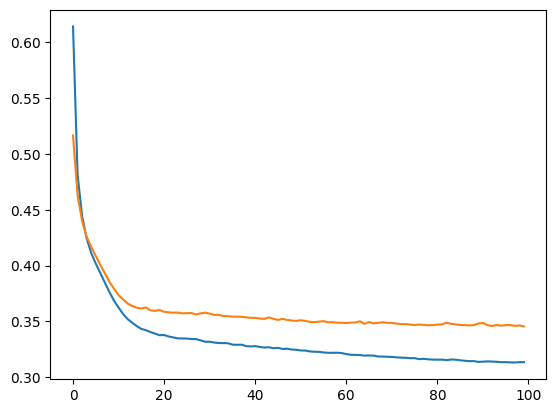

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

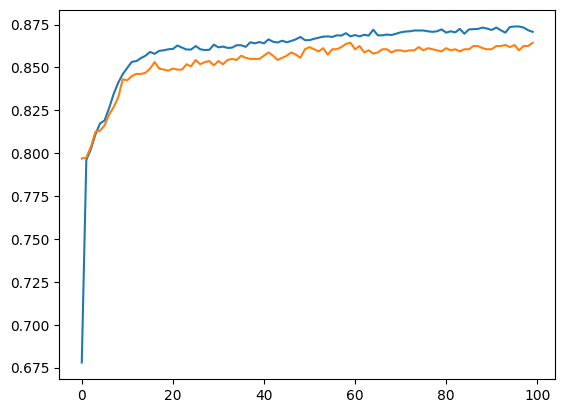

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [49]:
y_test.sample()

,Exited
1985,1


In [52]:
history.history

{'accuracy': [0.6779687404632568,
  0.796093761920929,
  0.8023437261581421,
  0.8109375238418579,
  0.8173437714576721,
  0.8190624713897705,
  0.8262500166893005,
  0.8345312476158142,
  0.8410937786102295,
  0.8460937738418579,
  0.8498437404632568,
  0.8532812595367432,
  0.8537499904632568,
  0.85546875,
  0.8568750023841858,
  0.8590624928474426,
  0.8579687476158142,
  0.8596875071525574,
  0.8600000143051147,
  0.8606250286102295,
  0.8607812523841858,
  0.8628125190734863,
  0.8615624904632568,
  0.8604687452316284,
  0.8604687452316284,
  0.862500011920929,
  0.8606250286102295,
  0.860156238079071,
  0.8603125214576721,
  0.86328125,
  0.8617187738418579,
  0.8621875047683716,
  0.8614062666893005,
  0.8615624904632568,
  0.8629687428474426,
  0.8629687428474426,
  0.8620312213897705,
  0.8646875023841858,
  0.864062488079071,
  0.8648437261581421,
  0.864062488079071,
  0.866406261920929,
  0.8650000095367432,
  0.8645312786102295,
  0.8656250238418579,
  0.8646875023841858

In [53]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [51]:
X_test.iloc[1985].values

array([6.2900000e+02, 4.1000000e+01, 1.0000000e+01, 1.5014851e+05,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.9362700e+03,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00])

In [57]:
y_pred_custom_log = model.predict(X_test_scaled[1985:1986])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [58]:
y_pred_custom_log

array([[0.18539758]], dtype=float32)

In [59]:
y_pred_custom = np.where(y_pred_custom_log > 0.5, 1, 0)

In [60]:
y_pred_custom

array([[0]])

In [61]:
y_test.iloc[1985]

0